In [1]:
import xarray 
import os
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import imdlib as imd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.io
import matplotlib.image as mpimg
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [2]:
x_train=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 1901-2010.csv",index_col=0)
y_train=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\Rainfall Cluster Number 1901-2010.csv",index_col=0)
x_test=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\SSTA Category 2011-2022.csv",index_col=0)
y_test=pd.read_csv(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\CSV Excel Data\Rainfall Cluster Number 2011-2022.csv",index_col=0)

In [3]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [4]:
y_pred = model.predict(x_test)
y_pred

array([3, 4, 8, 3, 3, 3, 8, 3, 3, 3, 3, 6], dtype=int64)

In [5]:
y_array=y_test.values.ravel()
y_array

array([0, 4, 0, 6, 1, 3, 6, 3, 0, 4, 3, 8], dtype=int64)

In [6]:
accuracy_score(y_pred,y_array)

0.3333333333333333

In [7]:
clusters=[]
for i in range(1,10):
    clusters.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\IMD 9 Rainfall Clusters Images\Cluster {i}.png"))
    

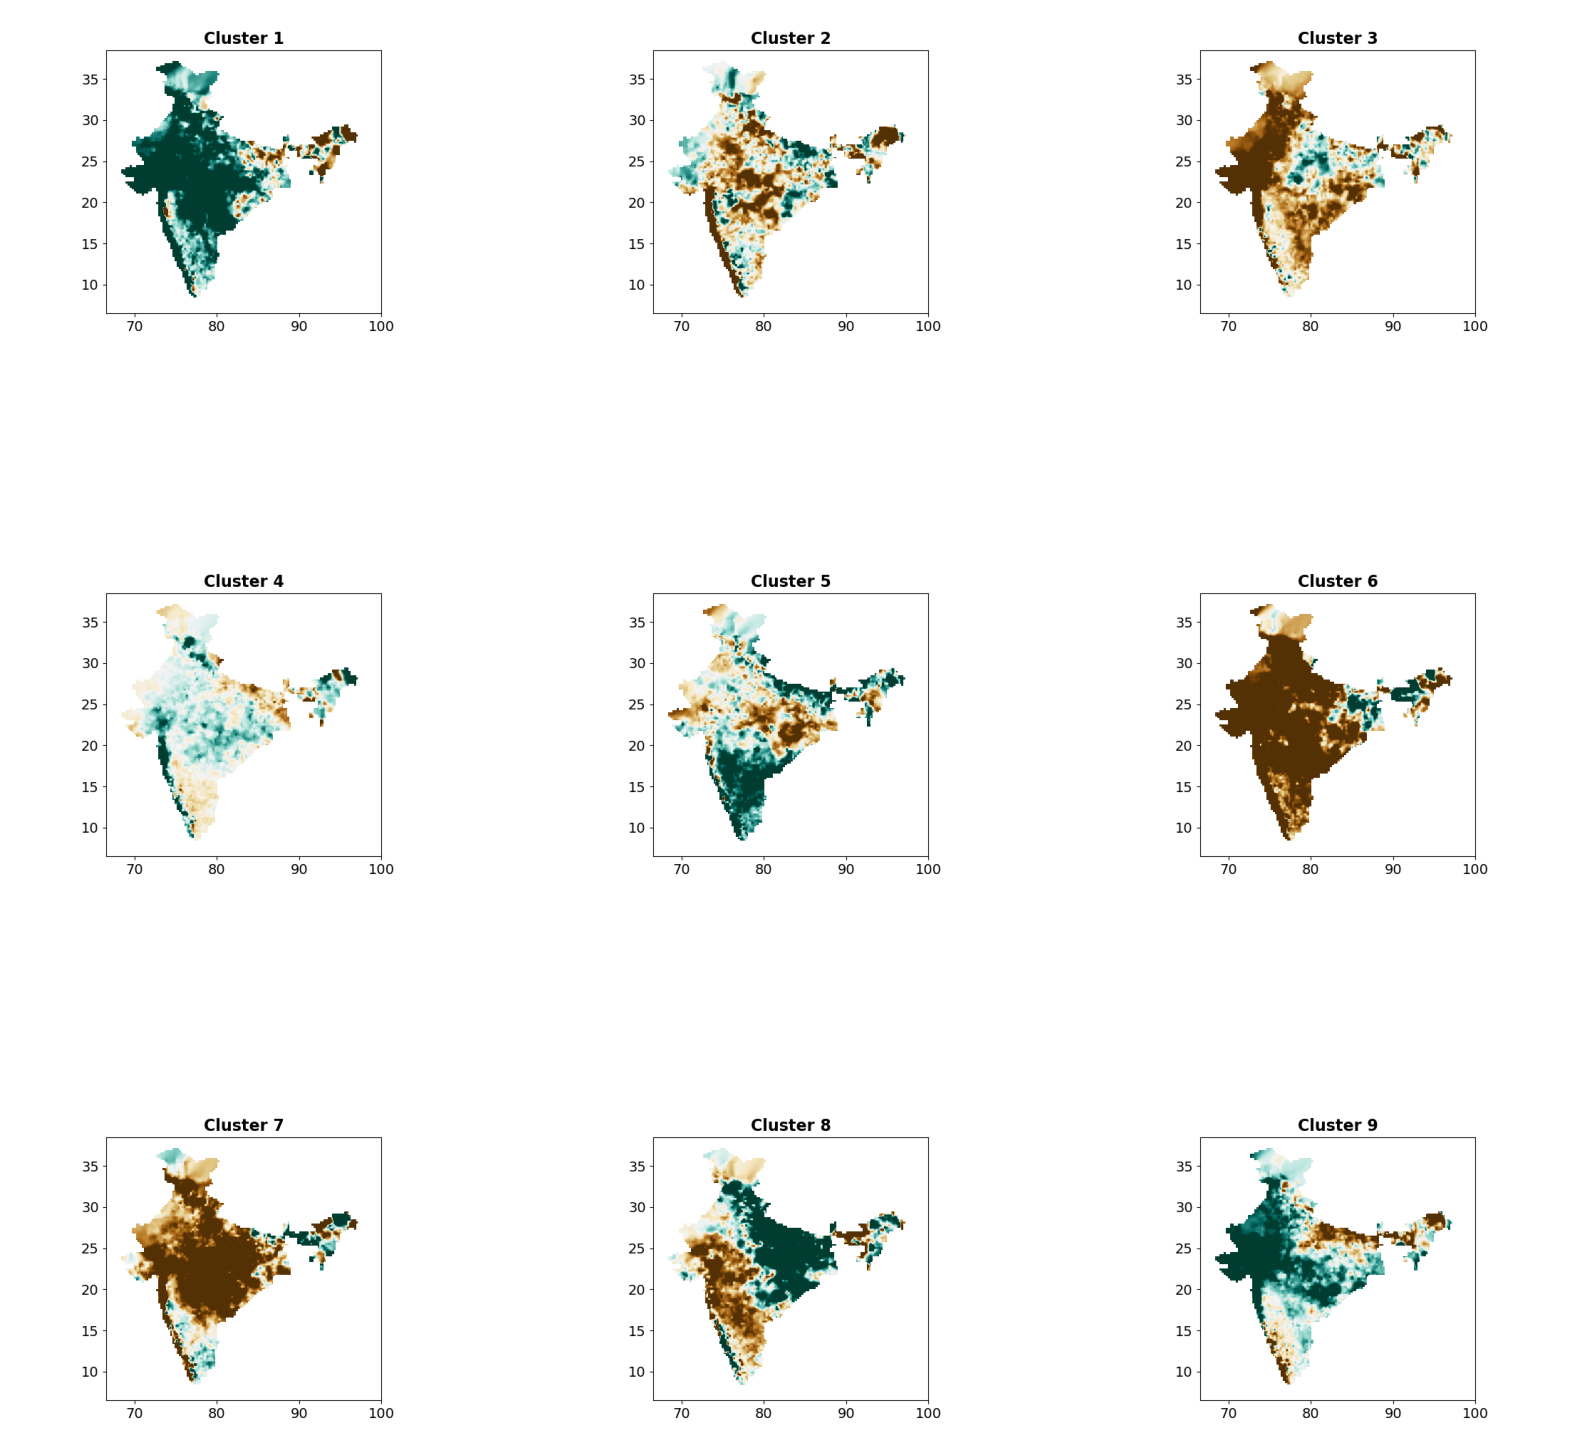

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, ax in enumerate(axes.ravel()):
    if i < len(clusters):
        ax.imshow(clusters[i])
        ax.axis('off')

In [10]:
actual_years_map=[]
year=2011
for i in range(12):
    actual_years_map.append(mpimg.imread(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Our Work\Rainfall Anomaly Images\\{year} Rainfall.png"))
    year+=1
                        

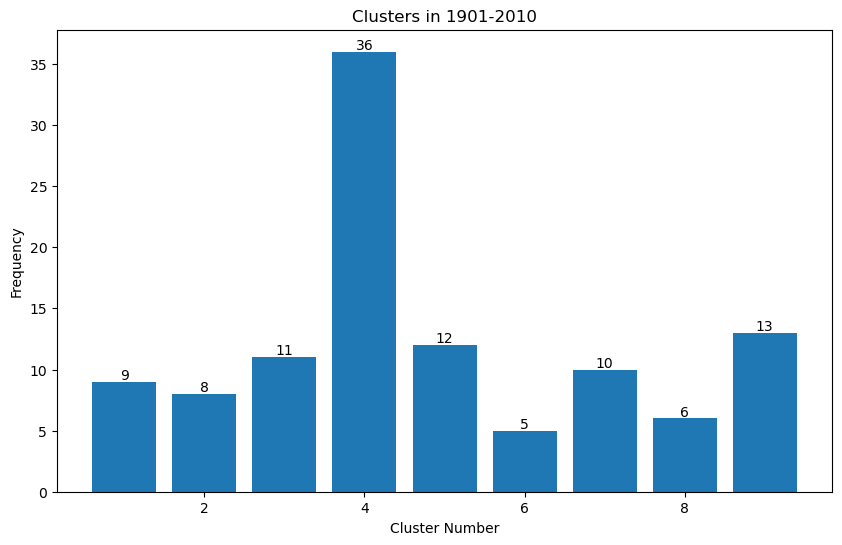

In [12]:
cluster_counts = y_train['Cluster Number'].value_counts().sort_index()

# Create a new Series with incremented index values
updated_index = cluster_counts.index + 1

# Create a new Series with the updated index values and the same data
cluster_counts = pd.Series(cluster_counts.values, index=updated_index, name="Cluster Number")


plt.figure(figsize=(10, 6))
bars1=plt.bar(cluster_counts.index, cluster_counts.values)
plt.title("Clusters in 1901-2010")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")
for bar, freq in zip(bars1, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(freq), ha='center')

#plt.savefig('Clusters in 1901-2010.png')

In [13]:
cluster_counts

1     9
2     8
3    11
4    36
5    12
6     5
7    10
8     6
9    13
Name: Cluster Number, dtype: int64

In [14]:
unique_values, value_counts = np.unique(y_pred, return_counts=True)
for i in range(len(unique_values)):
    unique_values[i]=unique_values[i]+1
    
plt.figure(figsize=(10, 6))  # Set the figure size
bars=plt.bar(unique_values, value_counts)
plt.title("Clusters in 2011-2022")
plt.xlabel("Cluster Number")
plt.ylabel("Frequency")

for bar, freq in zip(bars, value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, str(freq), ha='center')
#plt.savefig('Clusters in 2011-2022.png')


In [15]:
y_pred

array([4, 6, 8, 3, 3, 3, 3, 3, 3, 3, 3, 6], dtype=int64)

In [16]:
fig, axes = plt.subplots(12, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_pred[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Predicted Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')


In [17]:
#Actual Years
fig, axes = plt.subplots(12, 2, figsize=(10, 60)) 
j=0
for i, ax in enumerate(axes.ravel()):
    
    if((i+1)%2==0):
        pred_clus=y_array[j]
        ax.imshow(clusters[pred_clus])
        ax.axis('off')
        ax.set_title(f'Actual Cluster')
        j+=1
    elif((i+1)%2==1):
        ax.imshow(actual_years_map[j])
        ax.axis('off')
        ax.set_title('Actual Anomaly')

In [18]:
# fig, axes = plt.subplots(2, 12, figsize=(100, 10)) 
# j=0
# k=0
# for i, ax in enumerate(axes.ravel()):
    
#     if(i>=12):
#         pred_clus=y_pred[k]
#         ax.imshow(clusters[pred_clus])
#         ax.axis('off')
#         ax.set_title(f'Predicted Cluster')
#         k+=1
#     else:
#         ax.imshow(actual_years_map[j])
#         ax.axis('off')
#         ax.set_title('Actual Anomaly')
#         j+=1
#
#plt.savefig('Prediction.png')


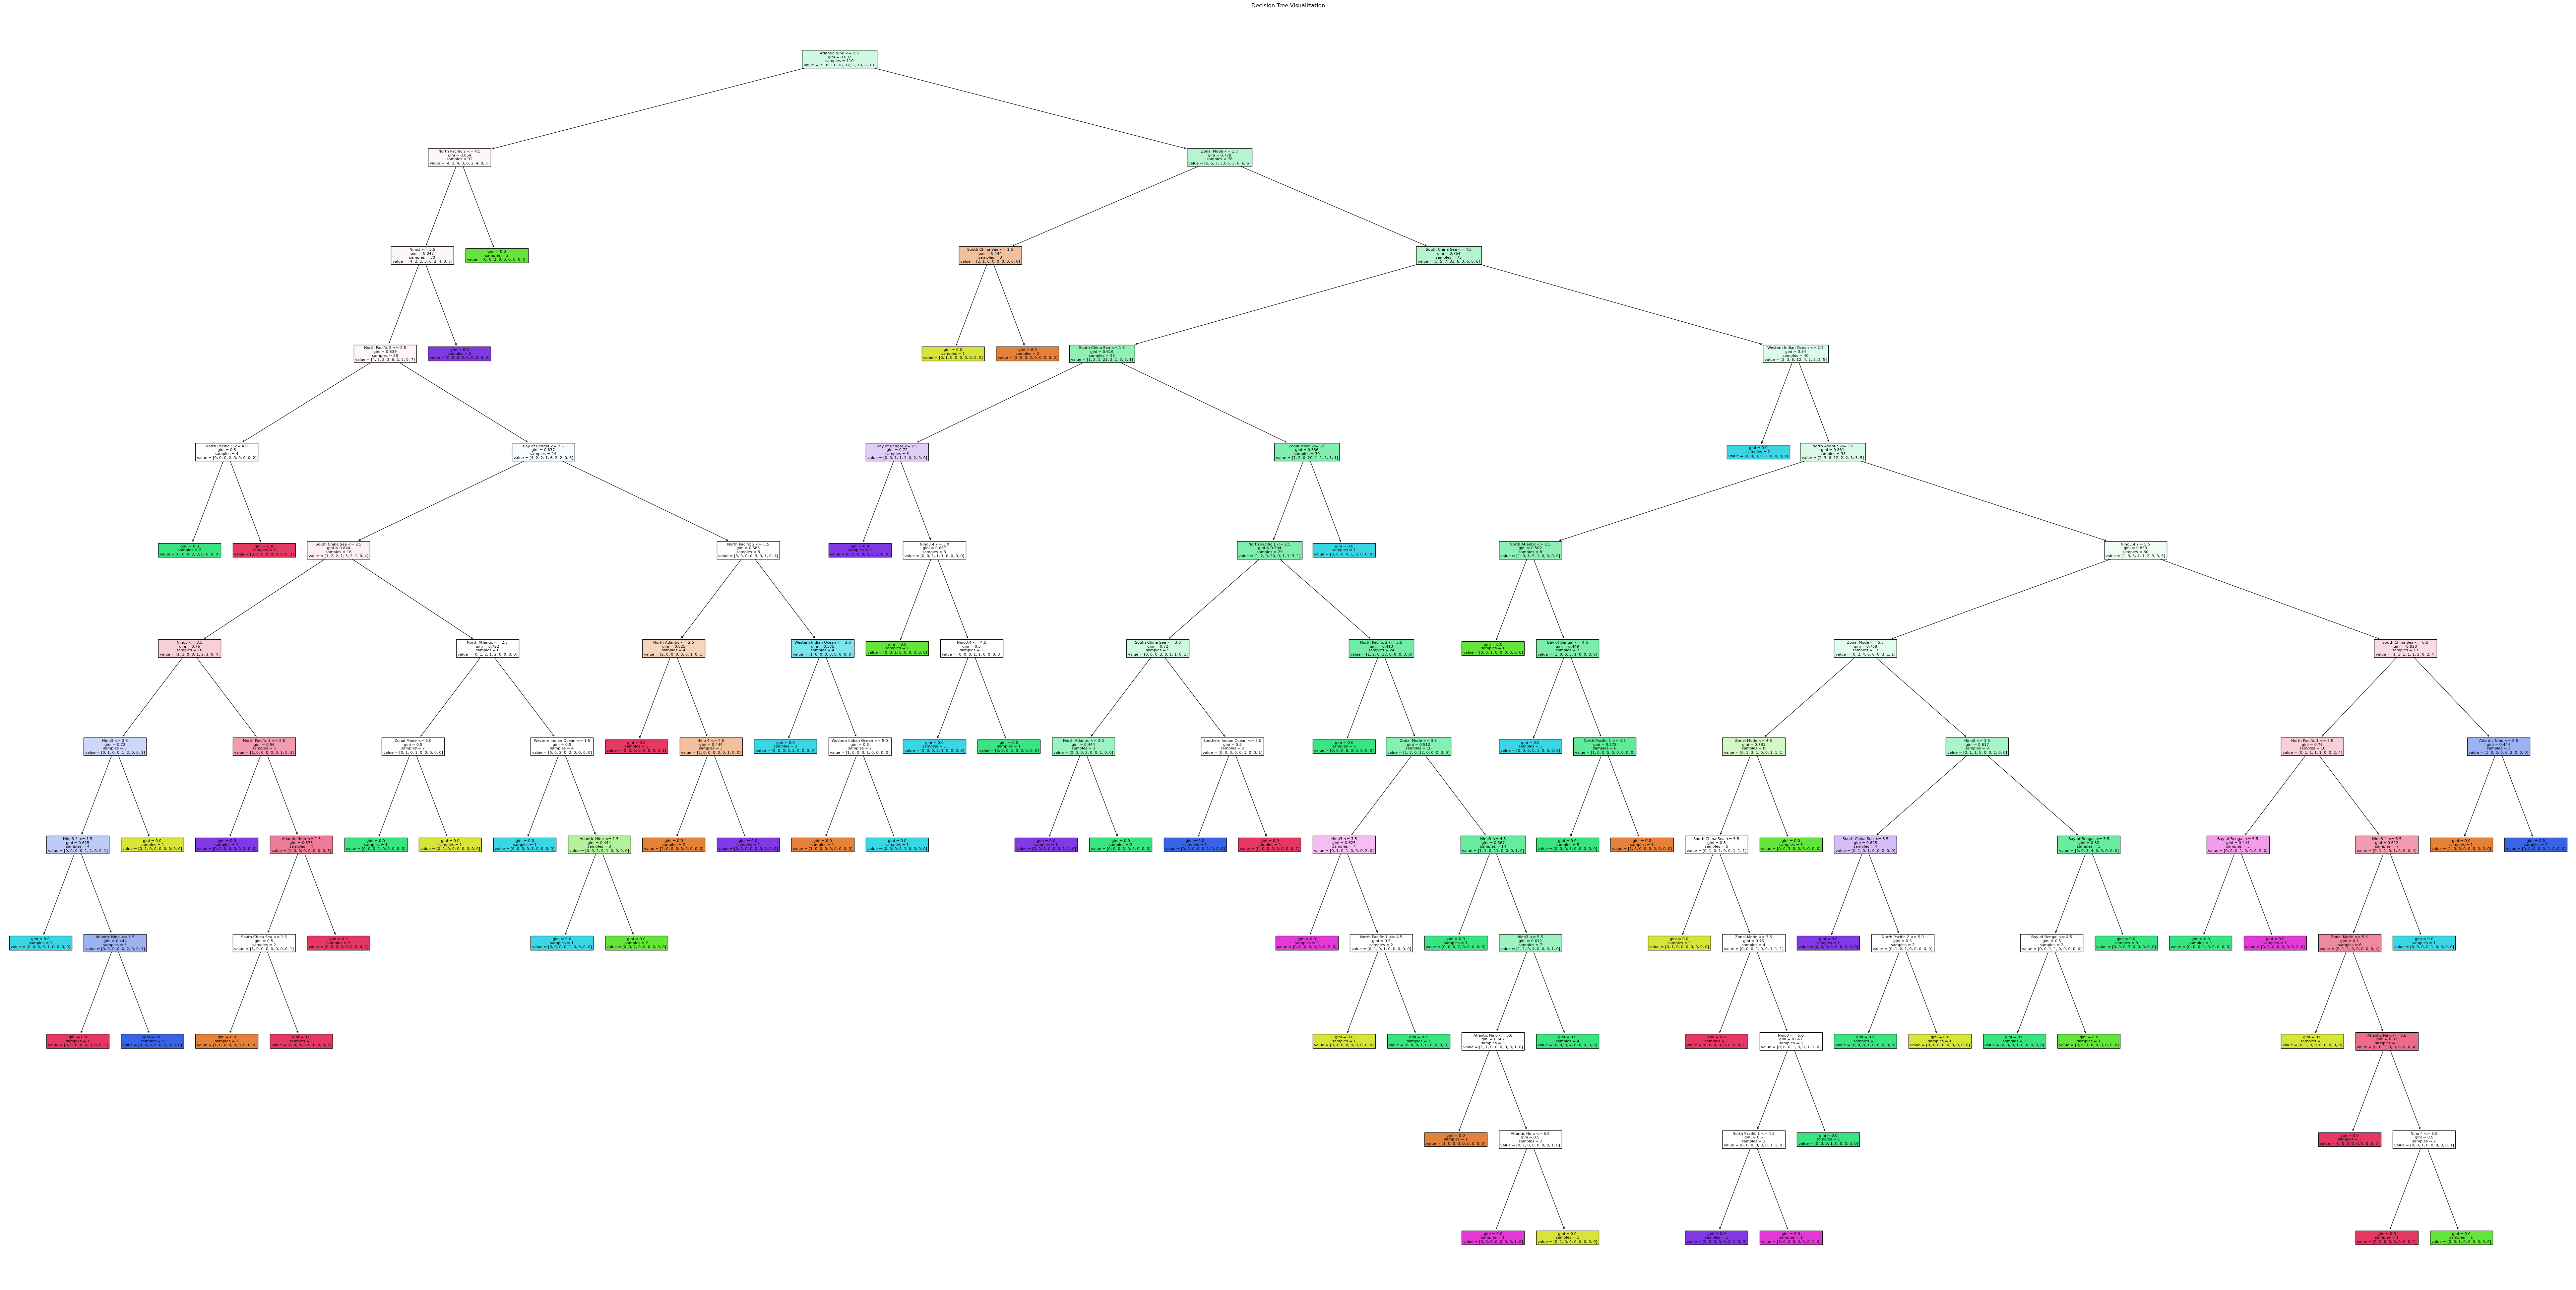

In [19]:
# Assuming you've already trained your Decision Tree classifier (clf)

cols=['Atlantic Nino', 'Bay of Bengal', 'Zonal Mode', 'Nino3', 'Nino3.4', 'Nino 4', 'North Atlantic', 'North Pacific 1', 'North Pacific 2', 'South China Sea', 'Southern Indian Ocean', 'Western Indian Ocean']


plt.figure(figsize=(100, 50))
tree.plot_tree(model, filled=True, feature_names=cols)
plt.title("Decision Tree Visualization")
#plt.savefig(f'CART.png', dpi=100, bbox_inches='tight')

plt.show()


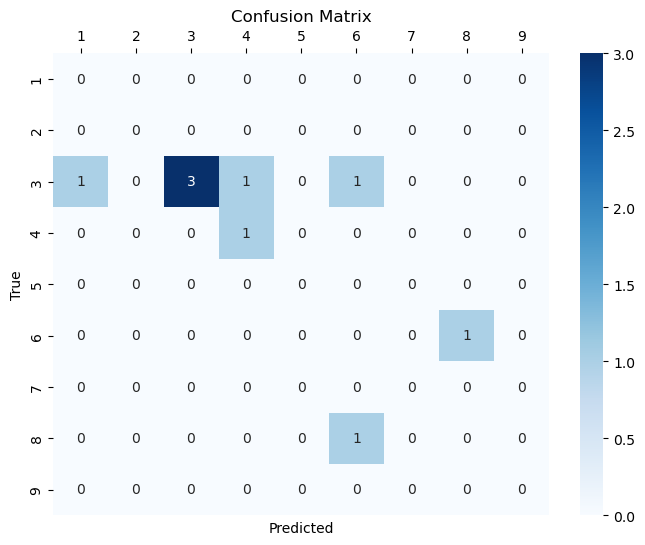

In [10]:
# Create a confusion matrix
cm = confusion_matrix(y_pred, y_array,labels=range(1,10))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(1, 10), yticklabels=range(1, 10))
plt.gca().xaxis.set_ticks_position('top')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [11]:
# Calculate the F1 score
f1 = f1_score(y_array, y_pred, average='macro')
precision = precision_score(y_array, y_pred, average='macro')
recall = recall_score(y_array, y_pred, average='macro')

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.202020202020202
Precision: 0.22916666666666666
Recall: 0.25


C:\Users\ratho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
